In [1]:
# Importing Libraries
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
#from kmodes.kmodes import KModes
import warnings
warnings.filterwarnings("ignore") 

In [2]:
df=pd.read_csv('bankmarketing.csv')

In [3]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [4]:
df.shape

(41188, 21)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,41188.0,40.024060,10.421250,17.000,32.000,38.000,47.000,98.000
duration,41188.0,258.285010,259.279249,0.000,102.000,180.000,319.000,4918.000
campaign,41188.0,2.567593,2.770014,1.000,1.000,2.000,3.000,56.000
pdays,41188.0,962.475454,186.910907,0.000,999.000,999.000,999.000,999.000
previous,41188.0,0.172963,0.494901,0.000,0.000,0.000,0.000,7.000
emp.var.rate,41188.0,0.081886,1.570960,-3.400,-1.800,1.100,1.400,1.400
cons.price.idx,41188.0,93.575664,0.578840,92.201,93.075,93.749,93.994,94.767
cons.conf.idx,41188.0,-40.502600,4.628198,-50.800,-42.700,-41.800,-36.400,-26.900
euribor3m,41188.0,3.621291,1.734447,0.634,1.344,4.857,4.961,5.045
nr.employed,41188.0,5167.035911,72.251528,4963.600,5099.100,5191.000,5228.100,5228.100


In [7]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [8]:
bank_cust=df[['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y']]

In [9]:
bank_cust.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [10]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
bank_cust = bank_cust.apply(le.fit_transform)
bank_cust.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,39,3,1,0,0,0,0,1,6,1,...,0,26,0,1,8,18,16,287,8,0
1,40,7,1,3,1,0,0,1,6,1,...,0,26,0,1,8,18,16,287,8,0
2,20,7,1,3,0,2,0,1,6,1,...,0,26,0,1,8,18,16,287,8,0
3,23,0,1,1,0,0,0,1,6,1,...,0,26,0,1,8,18,16,287,8,0
4,39,7,1,3,0,0,2,1,6,1,...,0,26,0,1,8,18,16,287,8,0


In [11]:
bank_cust.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [12]:
print(df.job.unique())
print(bank_cust.job.unique())

['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']
[ 3  7  0  1  9  5  4 10  6 11  2  8]


In [13]:
df.default.unique()

array(['no', 'unknown', 'yes'], dtype=object)

In [14]:
df.housing.unique()

array(['no', 'yes', 'unknown'], dtype=object)

In [15]:
df.loan.unique()

array(['no', 'yes', 'unknown'], dtype=object)

In [16]:
bank_cust.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [17]:
X=bank_cust.drop(['y'], axis=1)

In [18]:
from sklearn.preprocessing import StandardScaler
sc_X=StandardScaler()
X=pd.DataFrame(sc_X.fit_transform(X), columns=['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed'])

In [19]:
X.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,1.533408,-0.201579,-0.283741,-1.753925,-0.513600,-1.087707,-0.452491,1.31827,0.762558,-0.718834,0.024759,-0.567968,0.191842,-0.349494,0.192622,0.504484,0.684076,0.947396,0.456785,0.062804
1,1.629388,0.911227,-0.283741,-0.349730,1.945327,-1.087707,-0.452491,1.31827,0.762558,-0.718834,-0.444048,-0.567968,0.191842,-0.349494,0.192622,0.504484,0.684076,0.947396,0.456785,0.062804
2,-0.290207,0.911227,-0.283741,-0.349730,-0.513600,0.942127,-0.452491,1.31827,0.762558,-0.718834,-0.121743,-0.567968,0.191842,-0.349494,0.192622,0.504484,0.684076,0.947396,0.456785,0.062804
3,-0.002267,-1.036184,-0.283741,-1.285860,-0.513600,-1.087707,-0.452491,1.31827,0.762558,-0.718834,-0.435676,-0.567968,0.191842,-0.349494,0.192622,0.504484,0.684076,0.947396,0.456785,0.062804
4,1.533408,0.911227,-0.283741,-0.349730,-0.513600,-1.087707,2.311440,1.31827,0.762558,-0.718834,0.217304,-0.567968,0.191842,-0.349494,0.192622,0.504484,0.684076,0.947396,0.456785,0.062804


In [20]:
y=bank_cust.y

In [21]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: y, dtype: int64

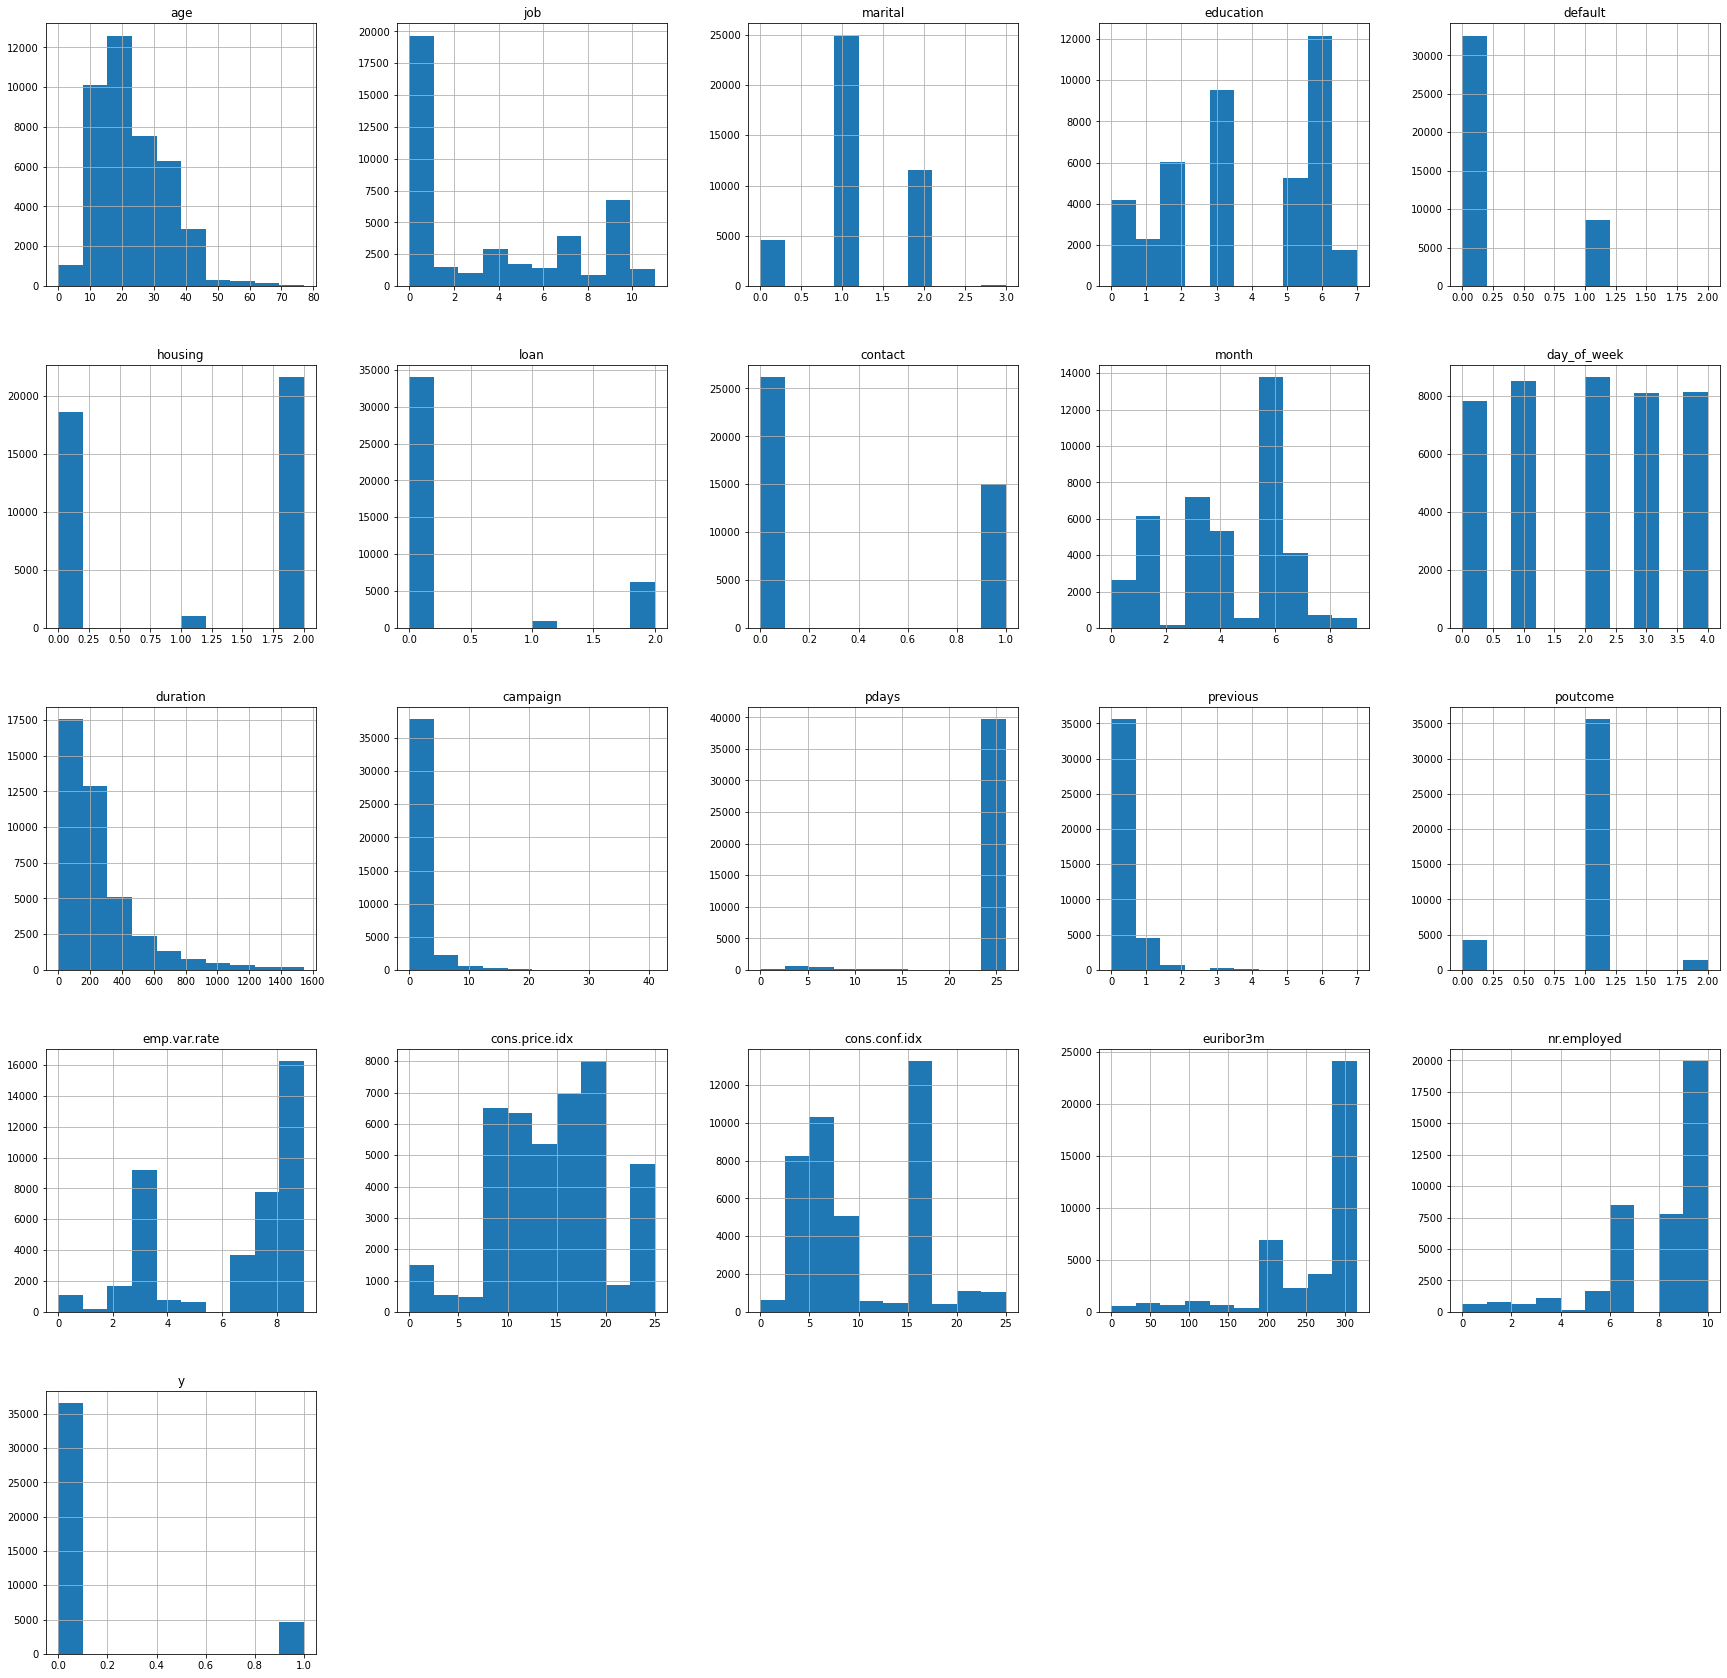

In [22]:
d=bank_cust.hist(figsize=(30,30))

In [23]:
X=bank_cust.drop('y',axis=1)
y=bank_cust.y

In [24]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=1/3,random_state=42,stratify=y)

# KNN

In [25]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import RFE
knn=KNeighborsClassifier()
rfe_knn=RFE(knn,25)
rfe_knn.fit(X_train,y_train)

RFE(estimator=KNeighborsClassifier(), n_features_to_select=25)

In [26]:
rfe_knn.score(X_test,y_test)

0.9050254916241807

Text(0.5, 15.0, 'Predicted label')

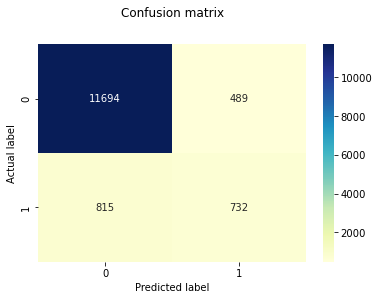

In [27]:
y_pred_knn=rfe_knn.predict(X_test)
from sklearn import metrics
cnf_matrix_knn=metrics.confusion_matrix(y_test, y_pred_knn)
p=sns.heatmap(pd.DataFrame(cnf_matrix_knn), annot=True, cmap='YlGnBu', fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [28]:
from sklearn.metrics import roc_curve
y_pred_proba=rfe_knn.predict_proba(X_test)[:,1]
fpr,tpr,thresholds=roc_curve(y_test, y_pred_proba)

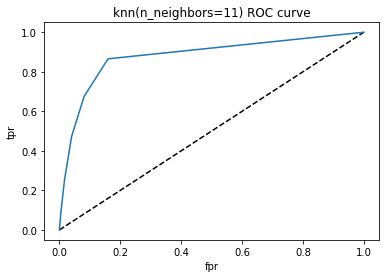

0.8786495334216122


In [29]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr, tpr, label='knn')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('knn(n_neighbors=11) ROC curve')
plt.show()
from sklearn.metrics import roc_auc_score
print(roc_auc_score(y_test,y_pred_proba))

# LogisticRegression

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
lg=LogisticRegression()
rfe_lg=RFE(lg,25)
rfe_lg.fit(X_train,y_train)

RFE(estimator=LogisticRegression(), n_features_to_select=25)

In [31]:
rfe_lg.score(X_test,y_test)

0.9080844865258558

Text(0.5, 15.0, 'Predicted label')

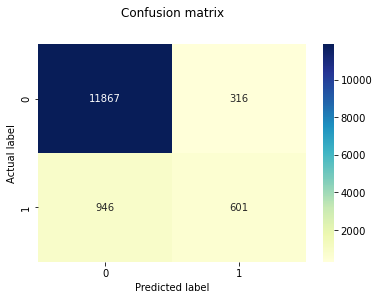

In [32]:
y_pred=rfe_lg.predict(X_test)
from sklearn import metrics
cnf_matrix=metrics.confusion_matrix(y_test, y_pred)
p=sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap='YlGnBu', fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [33]:
from sklearn.metrics import roc_curve
y_pred_proba=rfe_lg.predict_proba(X_test)[:,1]
fpr,tpr,thresholds=roc_curve(y_test, y_pred_proba)

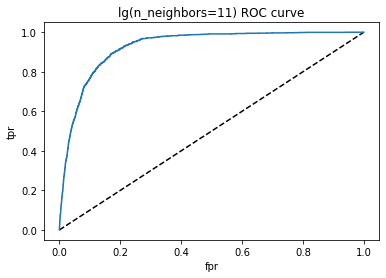

0.9275190386043985


In [34]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr, tpr, label='lg')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('lg(n_neighbors=11) ROC curve')
plt.show()
from sklearn.metrics import roc_auc_score
print(roc_auc_score(y_test,y_pred_proba))

# RandomForestClassifier

In [35]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
rf=RandomForestClassifier()
rfe_rf=RFE(rf,25)
rfe_rf.fit(X_train,y_train)

RFE(estimator=RandomForestClassifier(), n_features_to_select=25)

In [36]:
rfe_rf.score(X_test,y_test)

0.9155134741442098

Text(0.5, 15.0, 'Predicted label')

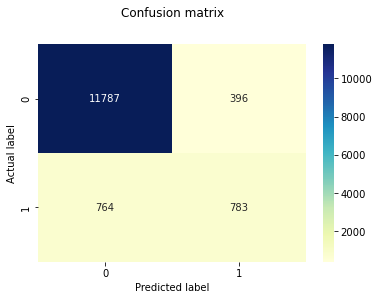

In [37]:
y_pred=rfe_rf.predict(X_test)
from sklearn import metrics
cnf_matrix=metrics.confusion_matrix(y_test, y_pred)
p=sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap='YlGnBu', fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [38]:
from sklearn.metrics import roc_curve
y_pred_proba=rfe_rf.predict_proba(X_test)[:,1]
fpr,tpr,thresholds=roc_curve(y_test, y_pred_proba)

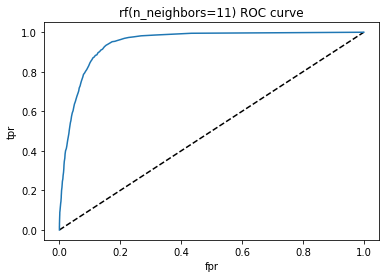

0.9450261077287165


In [39]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr, tpr, label='rf')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('rf(n_neighbors=11) ROC curve')
plt.show()
from sklearn.metrics import roc_auc_score
print(roc_auc_score(y_test,y_pred_proba))

# SVC

In [40]:
from sklearn.svm import SVC
from sklearn.feature_selection import RFE
svc=RandomForestClassifier()
rfe_svc=RFE(rf,25)
rfe_svc.fit(X_train,y_train)

RFE(estimator=RandomForestClassifier(), n_features_to_select=25)

In [41]:
rfe_svc.score(X_test,y_test)

0.9167516387472687

Text(0.5, 15.0, 'Predicted label')

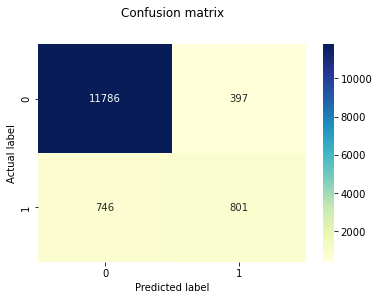

In [42]:
y_pred=rfe_svc.predict(X_test)
from sklearn import metrics
cnf_matrix=metrics.confusion_matrix(y_test, y_pred)
p=sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap='YlGnBu', fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [43]:
from sklearn.metrics import roc_curve
y_pred_proba=rfe_svc.predict_proba(X_test)[:,1]
fpr,tpr,thresholds=roc_curve(y_test, y_pred_proba)

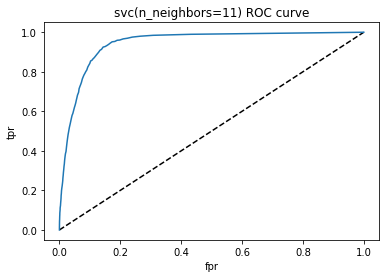

0.9427356228419427


In [44]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr, tpr, label='svc')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('svc(n_neighbors=11) ROC curve')
plt.show()
from sklearn.metrics import roc_auc_score
print(roc_auc_score(y_test,y_pred_proba))

In [45]:
from sklearn.svm import SVC

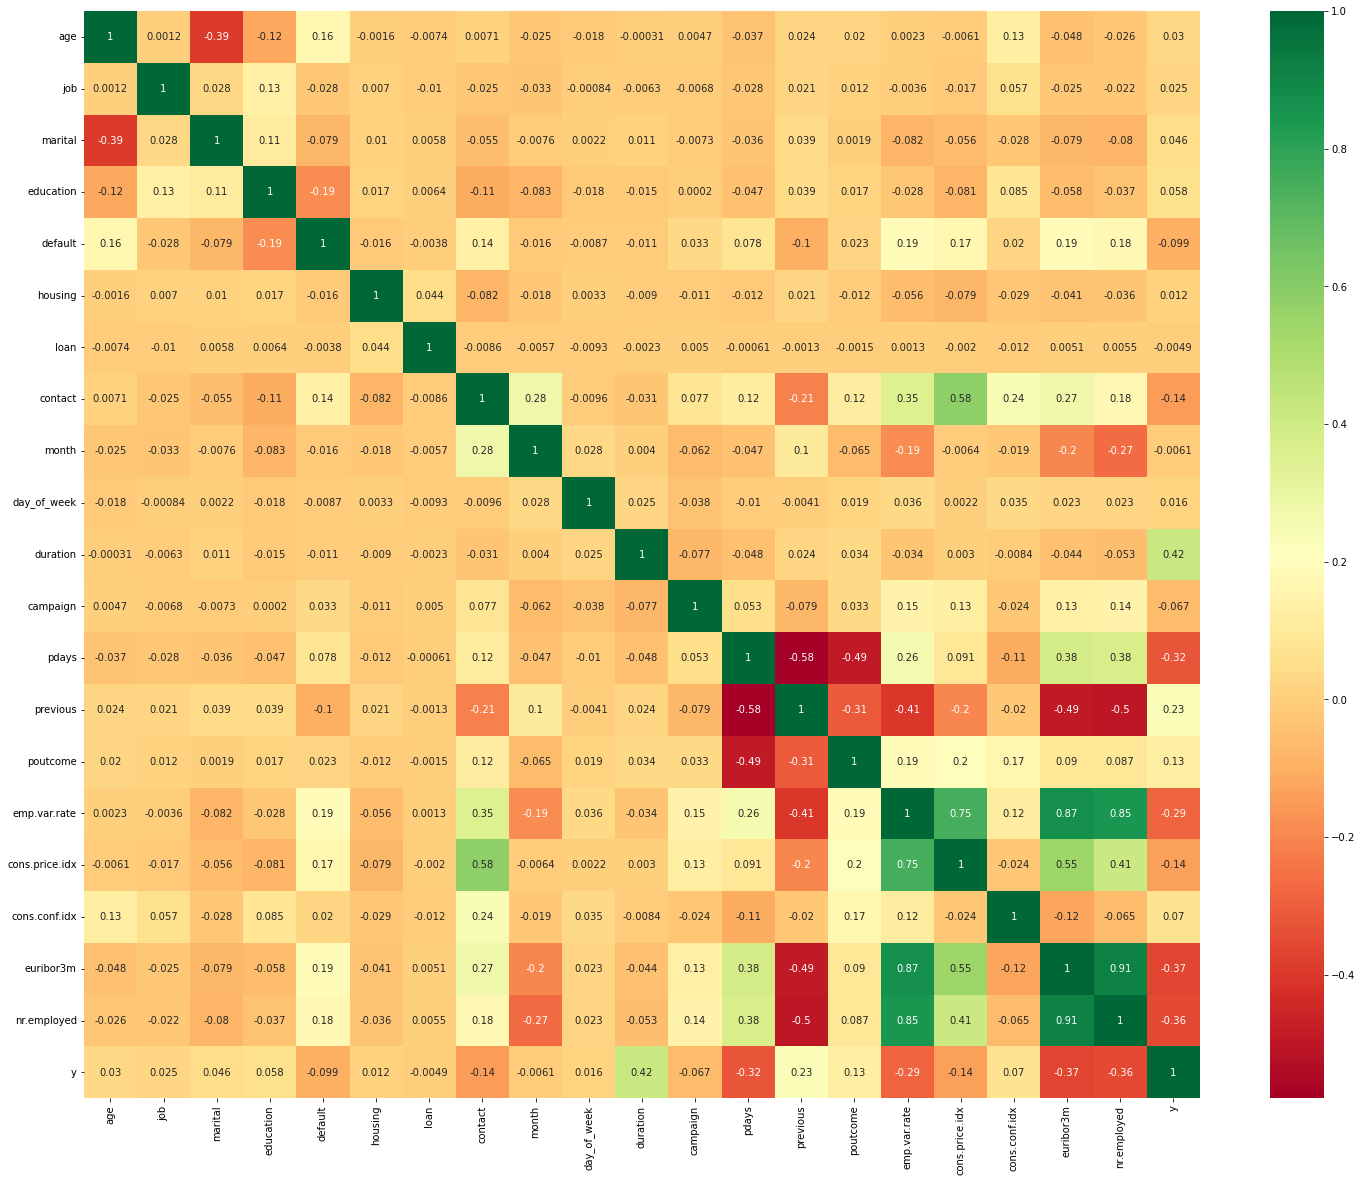

In [46]:
plt.figure(figsize=(25,20))
p=sns.heatmap(bank_cust.corr(), annot=True, cmap='RdYlGn')

In [47]:
X=X.drop(['age', 'job', 'marital', 'education','default', 'housing', 'loan','contact','month', 'day_of_week', 'campaign','cons.conf.idx','cons.price.idx','poutcome'], axis=1)

In [48]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=1/3,random_state=42,stratify=y)

In [49]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 20, stop = 200, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [50]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 10, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train,y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [20, 40, 60, 80, 100,
                                                         120, 140, 160, 180,
                                                         200]},
                   random_state=42, verbose=2)

In [51]:
rf_random.best_params_

{'n_estimators': 20,
 'min_samples_split': 5,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 10,
 'bootstrap': True}

In [52]:
rf_random_best_estimator=rf_random.best_estimator_
rf_random_best_estimator.score(X_test,y_test)

0.9161689730517116

Text(0.5, 15.0, 'Predicted label')

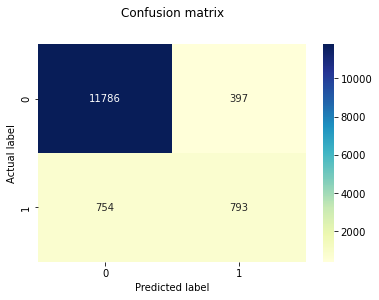

In [53]:
y_pred=rf_random_best_estimator.predict(X_test)
from sklearn import metrics
cnf_matrix=metrics.confusion_matrix(y_test, y_pred)
p=sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap='YlGnBu', fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [54]:
from sklearn.metrics import roc_curve
y_pred_proba=rf_random_best_estimator.predict_proba(X_test)[:,1]
fpr,tpr,thresholds=roc_curve(y_test, y_pred_proba)

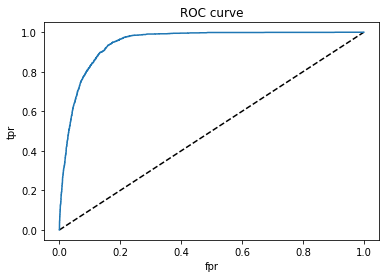

0.9460711490854747
[CV] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=140; total time=   2.1s
[CV] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=140; total time=   2.1s
[CV] END bootstrap=True, max_depth=50, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=20; total time=   0.3s
[CV] END bootstrap=False, max_depth=80, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   1.9s
[CV] END bootstrap=False, max_depth=90, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=60; total time=   1.0s
[CV] END bootstrap=False, max_depth=60, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=40; total time=   0.7s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=20; total time=   0.3s
[CV] END bootstrap=True, m

In [55]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr, tpr, label='svc')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC curve')
plt.show()
from sklearn.metrics import roc_auc_score
print(roc_auc_score(y_test,y_pred_proba))